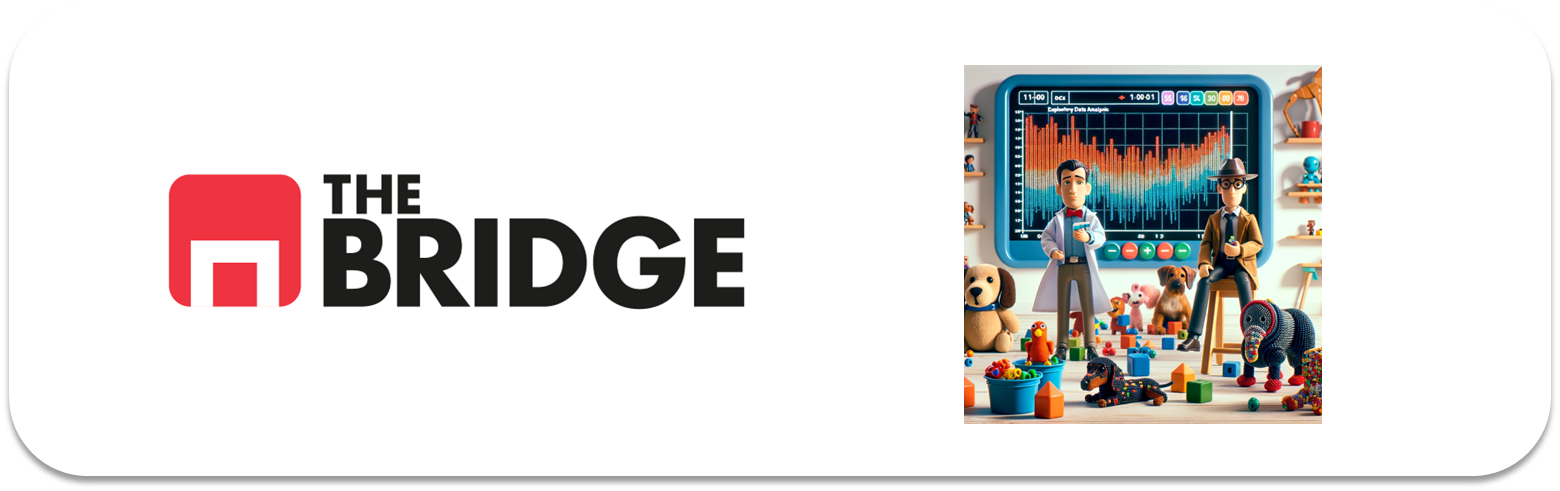

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms,grafico_dispersion_con_correlacion,bubble_plot

from scipy.stats import pearsonr, chi2_contingency, mannwhitneyu,f_oneway


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [46]:
df_titanic = pd.read_csv("./data/titanic.csv") # cargamos los datos
df_titanic.head() # comprobación de que los datos están bien cargados

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [47]:
df_titanic.drop(columns=["deck","survived","pclass","embarked"], inplace=True) # Llevamos a cabo la eliminación de las columnas que no nos hacen falta para el análisis.



In [48]:
df_titanic.columns # comprobación de que se han eliminado las columnnas

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male',
       'embark_town', 'alive', 'alone'],
      dtype='object')

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [49]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"] # Creamos la nueva columna que recoja todos los familiar de cada pasajero


In [50]:
df_titanic.drop(columns=["parch","sibsp"],inplace=True) # Eliminamos las columnas que hemos utilizado para crear la nueva columna, consiguiendo mayor limpieza en nuestro dataset.

In [51]:
df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [52]:
df_titanic['embark_town'].isnull().sum()


np.int64(2)

In [54]:
moda = df_titanic["embark_town"].mode()[0] # calculamos la moda de la columna embark_town y utilizamos mode[0] para obtener la primera moda en caso de que haya más de una.

# Imputar la moda en los valores nulos
df_titanic["embark_town"].fillna(moda, inplace=True)


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [55]:
df_titanic['age'].isnull().sum() # calculamos el número total de valores nulos en la colummna "age".


np.int64(177)

In [ ]:
df_titanic[df_titanic['age'].isnull()] # Presentamos los datos del dataframe donde "age" es nulo.


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
5,male,NaN,8.4583,Third,man,True,Queenstown,no,True,0
17,male,NaN,13.0000,Second,man,True,Southampton,yes,True,0
19,female,NaN,7.2250,Third,woman,False,Cherbourg,yes,True,0
26,male,NaN,7.2250,Third,man,True,Cherbourg,no,True,0
28,female,NaN,7.8792,Third,woman,False,Queenstown,yes,True,0
...,...,...,...,...,...,...,...,...,...,...
859,male,NaN,7.2292,Third,man,True,Cherbourg,no,True,0
863,female,NaN,69.5500,Third,woman,False,Southampton,no,False,10
868,male,NaN,9.5000,Third,man,True,Southampton,no,True,0
878,male,NaN,7.8958,Third,man,True,Southampton,no,True,0


In [57]:
df_titanic["who"].value_counts() # Lo que tenemos que hacer para ser más precisos es calcular la media de estos tres grupos de personas ya que de no hacer esto, la media sería poco representativa porque se tendría en cuenta tanto la persona de 1 año de edad como la de 85 años .

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [62]:
df_titanic.groupby("who")["age"].mean().round() # los hombres tienen de media 33 años, los niños 6 años y las mujeres 32 años.


who
child     6.0
man      33.0
woman    32.0
Name: age, dtype: float64

In [ ]:

df_titanic['age'] = df_titanic['age'].fillna(df_titanic.groupby('who')['age'].transform('mean')).round() # Reemplazamos los nulos de 'age' con la media del grupo correspondiente en 'who'
# Utilizamos el round() para redondear los años de tal modo que no nos aparezca decimales .


In [72]:
df_titanic['age'].isnull().sum() # calculamos el número total de valores nulos en la colummna "age" a modo de comprobación si ya no hay nulos.


np.int64(0)

In [104]:
df_titanic.head(10) # comprobación rapida de si los datos se han cambiado. Afirmamos que los campos de las edades donde aparecía NaN se han sustituido por los valores medios acrode a su valor en la columna "who".

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
5,male,33.0,8.4583,Third,man,True,Queenstown,no,True,0
6,male,54.0,51.8625,First,man,True,Southampton,no,True,0
7,male,2.0,21.0750,Third,child,False,Southampton,no,False,4
8,female,27.0,11.1333,Third,woman,False,Southampton,yes,False,2
9,female,14.0,30.0708,Second,child,False,Cherbourg,yes,False,1


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

## 1.1 RELACIÓN GÉNERO - SUPERVIVENCIA

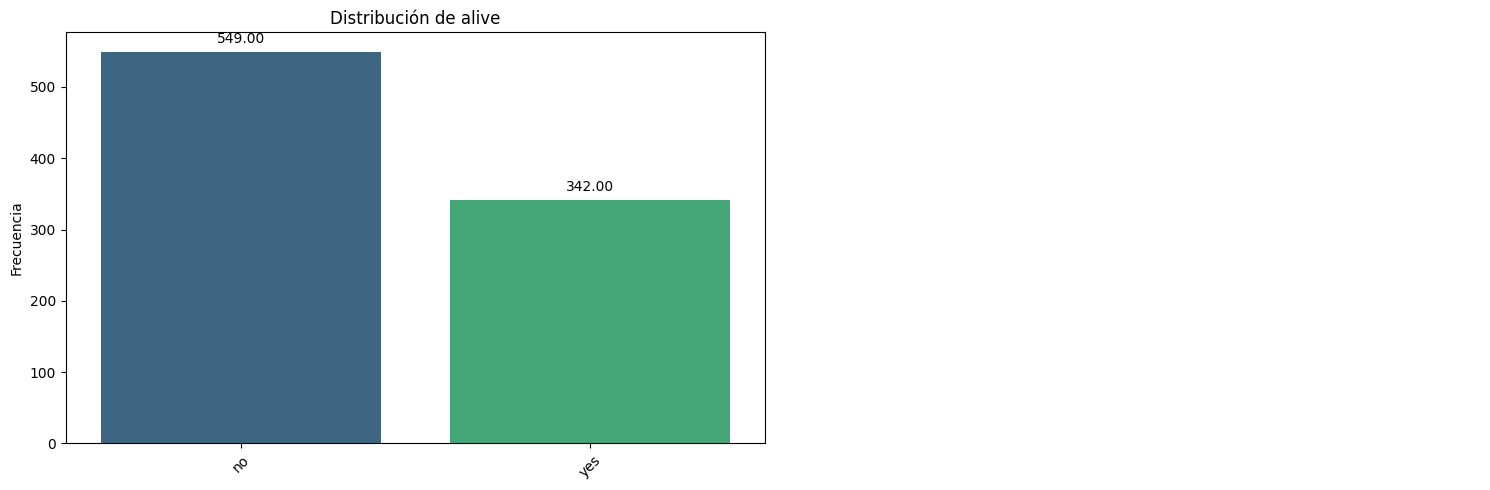

In [ ]:
#MOSTRAMOS LA DISTRIBUCIÓN DE FRECUENCIAS ABSOLUTAS DE LOS SUPERVIVIENTES
pinta_distribucion_categoricas(df_titanic,["alive"],relativa=False,mostrar_valores=True)

* 1.1 El número total de personas que sobrevivieron al accidente es de 342 frente a los 549 que no sobrevivieron.

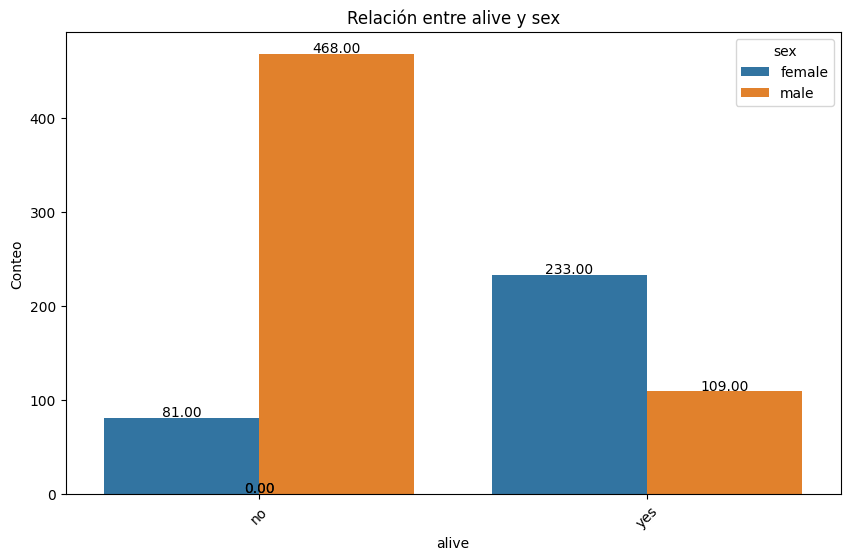

In [80]:
plot_categorical_relationship_fin(df_titanic,"alive","sex", relative_freq= False, show_values= True, size_group=4)

 1.1 DESCRIPTIVA ABSOLUTA GÉNERO-SUPERVIVENCIA
* Vemos una clara diferencia entre los géneros. Al accidente sobrevivieron 109 hombres frente a las 233 mujeres lo que supone una tasa de mortalidad de más del doble para los hombres.
* Añadir que no sobrevivieron 468 hombres mientras que fallecieron 81 mujeres. 
* Esta diferencia se puede dar a que la mayoría de la tripulación eran hombres pero esto lo veremos más adelante.

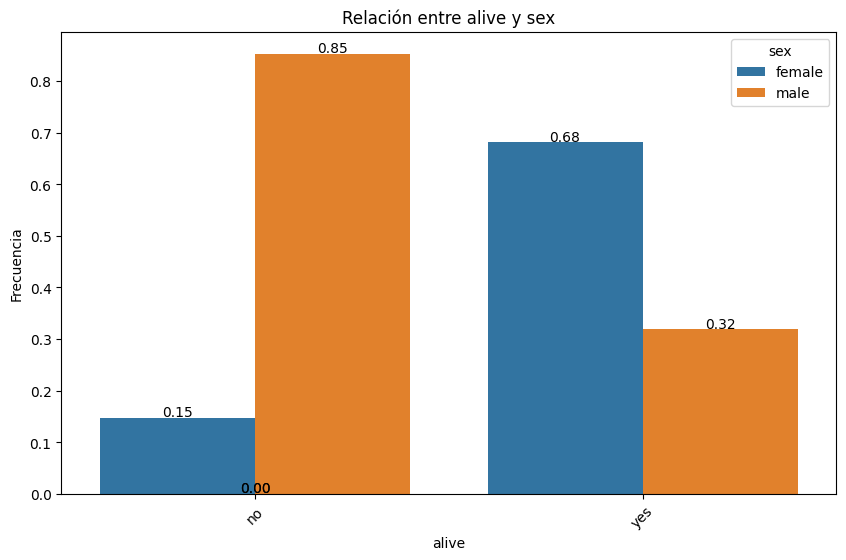

In [81]:
plot_categorical_relationship_fin(df_titanic,"alive","sex", relative_freq= True, show_values= True, size_group=4)

1.1 DESCRIPCIÓN RELATIVA GÉNERO-SUPERVIVENCIA
* El 32% de los supervivientes fueron hombres mientras que el 68 % fueron mujeres, lo cual supone a más del doble.
* En cuanto a no supervivientes, el 15 % de las personas que no sobrevivieron eran mujeres mientras que el 85% eran hombres.
* Hay una clara diferencia pero debemos de indagar más en los datos para poder sacar conclusiones adecuadas y precisas.

In [92]:
# ¿Hay evidencia de que el sexo o la edad (adulto/niño) influye en la probabilidad de sobrevivir? Esto se puede analizar con un test estadístico como chi-cuadrado.
tabla_sex = pd.crosstab(df_titanic['sex'], df_titanic['alive']) # Tabla de contingencia: sexo vs supervivencia

chi2, p, dof, expected = chi2_contingency(tabla_sex) # Test de chi-cuadrado

print(f'p-value para la relación entre el sexo y la supervivencia: {p}') 


p-value para la relación entre el sexo y la supervivencia: 1.1973570627755645e-58


1.1 RELACIÓN VARIABLE SEX - ALIVE  MÉTODO CHI-CUADRADO
* El p-value que nos sale del análisis de chi-cuadrado que analiza la relación entre el sexo y la supervivencia es de 1.19e-58, muy por debajo del 0.05. Esto quiere decir que podemos descartar la suposición de que ambas vriables son independientes. Añadimos que la relación es estadísticamente significativa.
* Este dato respalda lo visto anteriormente en las gráficas, la diferencia entre la tasa de mortalidad de los hombres y las mujeres.

In [93]:
tabla_who = pd.crosstab(df_titanic['who'], df_titanic['alive']) # Tabla de contingencia: sexo vs supervivencia

chi2, p, dof, expected = chi2_contingency(tabla_who) # Test de chi-cuadrado

print(f'p-value para la relación entre la variable who y la supervivencia: {p}') 

p-value para la relación entre la variable who y la supervivencia: 2.2227620817798914e-62


1.1 RELACIÓN VARIABLE WHO-ALIVE MÉTODO CHI-CUADRADO
* El p-vallue que nos sale del análisis de chi-cuadrado que analiza la relación entre si el superviviente es adulto o niño y su tasa de superviviencia es de 2.22e-62,igualmente muy por debajo del 0.05. Esto nos dice que podemos descartar la posibilidad de que las variables son completamente independientes y confirma que hay relación estadistica significativa entre las variables.


## 1.2 RELACIÓN CLASE - SUPERVIVENCIA

In [95]:
# sacamos una pequeña parte del df para no liarnos a la hora de mencionar campos o columnas
df_titanic.head(5)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


In [100]:
# sacamos una tabla que nos muestre el total de personas por cada clase, como una primera idea de los supervivientes por clase. Esta tabla está bien pero mejor lo representamos gráficamente .
tabla_class = pd.crosstab(df_titanic["class"],df_titanic["alive"])
tabla_class

alive,no,yes
class,,
First,80,136
Second,97,87
Third,372,119


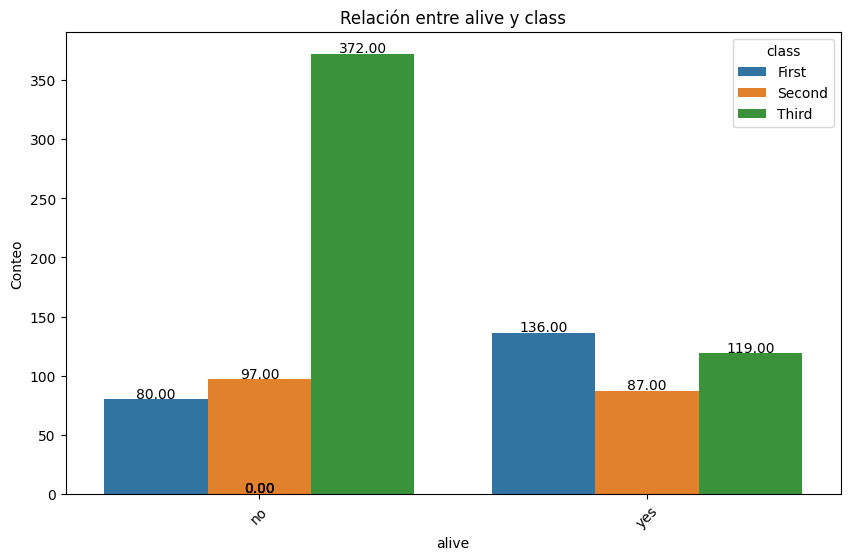

In [101]:
# Necesitamos sacar las distribuciones tanto absolutas como relativas de la supervivencia según la clase del boleto de cada persona.
plot_categorical_relationship_fin(df_titanic,"alive","class", relative_freq= False, show_values= True, size_group=4)

1.2 DESCRIPCIÓN FRECUENCIAS ABOSLUTAS
* En cuanto a la primera clase, se salvaron 136 personas frente a las 80 que fallecieron. Esto supone que la primera calse tiene una tasa de fallecimiento del 37 %.
* La segunda clase tiene alrededor de 20 fallecidos más que la primera. Sin embargo, el número de personas que se salvaron es menor  por lo que la tasa de supervivencia es del 52%. Esto nos dice que más de la mitad de las personas de segunda clase fallecieron.
* Por último, la tercera clase tiene los números más altos de no supervivencia. En esta clase fallecieron 372 personas frente a las 119 que lograron sobrevivir al accidente. Esto supone una tasa de superviviencia muy baja del 25%.
* Como hemos ido viendo , tanto el género como si es adulto o no influye de alguna manera en la tasa de resultados. Sería intersante ver la cantidad de niños y mujeres por clase hay para poder complementar la información.

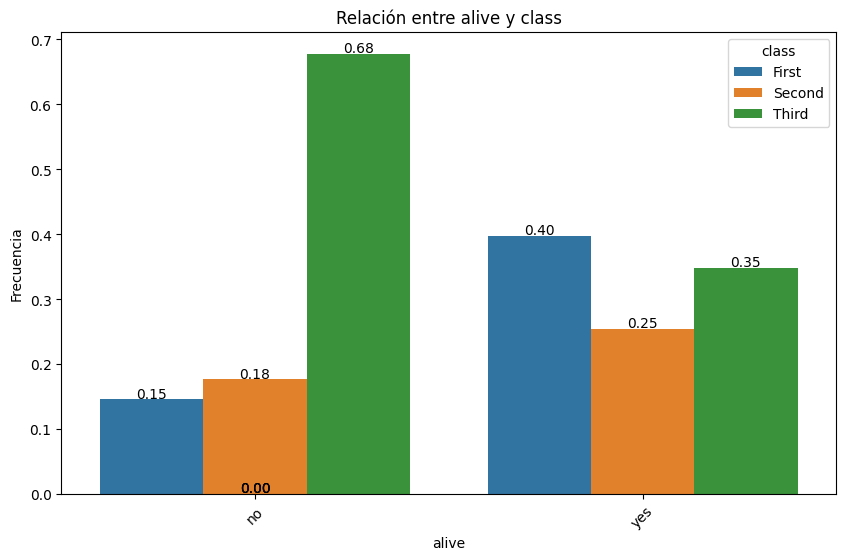

In [102]:
plot_categorical_relationship_fin(df_titanic,"alive","class", relative_freq= True, show_values= True, size_group=4)

DESCRIPCIÓN FRECUENCIAS RELATIVAS
* Tenemos unos datos interesantes. A simple vista podemos ver que la clase del billete influye en la superviviencia del pasajero.
* El 68% las personas que no sobrevivieron tenían un billete de tercera clase. Por otro lado , el 35 % de los supervivientes pertenecían a la tercera clase.
* Lo números cambian drásticamente para las personas de primera clase. El 15 % de las personas que fallecieron pertenecían a la primera clase. Por otro lado , el 40 % de los supervivientes pertenecían a esta misma clase.
* En cuando a la segunda clase, los números son parecidos a la primera clase sin embargo la tasa de supervivencia es menor que a los de la primera clase.

In [ ]:
# ¿Hay evidencia de que la clase influye en la probabilidad de sobrevivir? Esto se puede analizar con un test estadístico como chi-cuadrado.

chi2, p, dof, expected = chi2_contingency(tabla_class) # Test de chi-cuadrado, utilizamos la tabla de contingencia que sacamos antes para ver por de manera rápida el número de superviviente sy no supervivientes como sus respectivas clases.

print(f'p-value para la relación entre la clase y la supervivencia: {p}') 


p-value para la relación entre el sexo y la supervivencia: 4.549251711298793e-23


RELACIÓN VARIABLES CLASE-ALIVE MEDIANTE MÉTODO CHI-CUADRADO
* El p-value que nos da el análsis está muy por debajo de 0.05 por lo que podemos descartar la hipótesis de que las dos variables son independientes.
* También añadimos que la relación entre ambas variables es estadísticamente significativa.

## 1.3 RELACIÓN CIUDAD DE EMBARQUE - SUPERVIVENCIA

In [107]:
df_titanic.head(5)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


In [108]:
# sacamos una tabla que nos muestre el total de personas por cada ciudad, como una primera idea de los supervivientes por ciudad. Esta tabla se utilizará más adelante en nuestro análisis de chi cuadrado
tabla_embark = pd.crosstab(df_titanic["embark_town"],df_titanic["alive"])
tabla_embark

alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,219


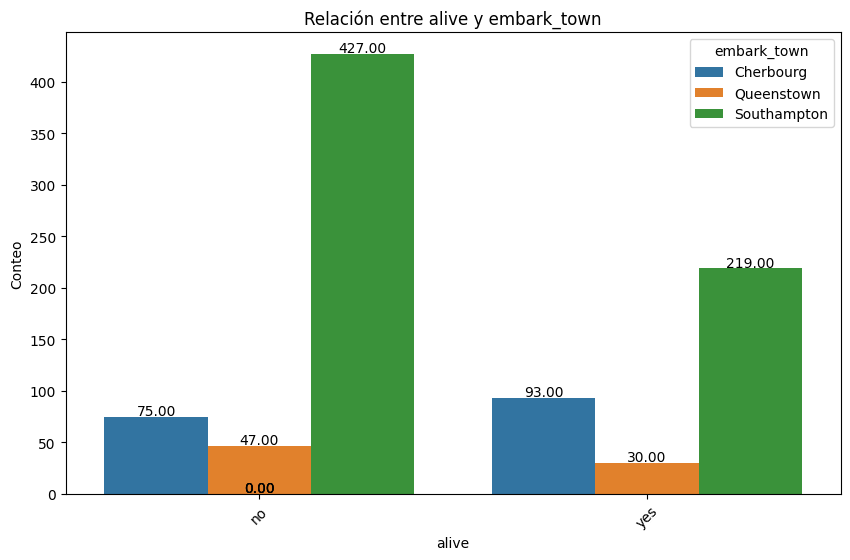

In [109]:
plot_categorical_relationship_fin(df_titanic,"alive","embark_town", relative_freq= False, show_values= True, size_group=4)

1.3 DESCRIPCIÓN FRECUENCIA ABOSLUTA
* La mayoría de supervivientes procedían de Southamton siendo estos 219 personas frente a las 123 de otras ciudades.

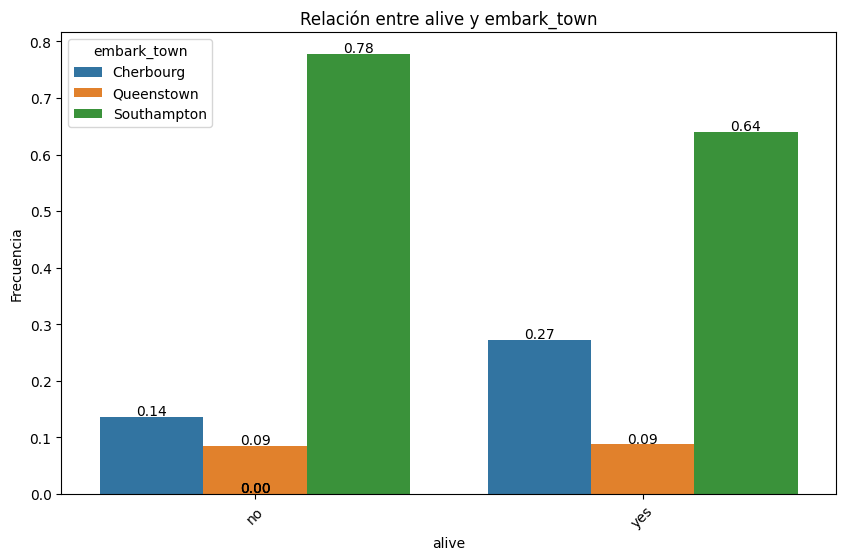

In [111]:
plot_categorical_relationship_fin(df_titanic,"alive","embark_town", relative_freq=True , show_values= True, size_group=4)

1.3 DESCRIPCIÓN FRECUENCIAS RELATIVAS
* El 64 % de los supervivientes procedían de Southampton . El 27% de supervivientes de Cherbourg y el resto de Queenstow.
* Todavía es pronto para empezar a decir los motivos de por qué pasajeros de algunas ciudades han sobrevivido más. 
* La mayoría de superviviente vienen de Southampton pero eso no quiere decir que haya sido más seguro proceder de allí. A priori el elevado número de supervivientes se puede deber a que la gran mayoría de pasajeros procedían de allí. Lo emncionado lo respalda la gran mortalidad también procedente de esa ciudad, situandose en un 78% de los fallecidos, o lo que es igual, 427 personas.

In [112]:
# ¿Hay evidencia de que la ciudad de proveniencia  influye en la probabilidad de sobrevivir? Esto se puede analizar con un test estadístico como chi-cuadrado.

chi2, p, dof, expected = chi2_contingency(tabla_class) # Test de chi-cuadrado, utilizamos la tabla de contingencia que sacamos antes para ver por de manera rápida el número de superviviente sy no supervivientes como sus respectivas ciudades.

print(f'p-value para la relación entre la ciudad de proveniencia y la supervivencia: {p}') 

p-value para la relación entre la ciudad de proveniencia y la supervivencia: 4.549251711298793e-23


RELACIÓN VARIABLES CIUDAD DE EMBARQUE -ALIVE MEDIANTE MÉTODO CHI-CUADRADO
* Podemos descartar con total certeza la hipótesis de que la ciudad no influye en la tasa de supervivencia. Hay una relación estadistica significativa entre ambas variables.

## 1.4 RELACIÓN VARIABLE FARE - ALIVE

In [114]:
df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


In [115]:
# Lo primero que vamos a calcular es la media del billete para las personas que sobrevivieron y para las que no.
df_titanic.groupby("alive")["fare"].mean()

alive
no     22.117887
yes    48.395408
Name: fare, dtype: float64

* De primeras podemos decir que el coste del billete influye en la superviviencia. Sin embargo, no sabemos si la media es representativa ya que podría haber outliers que distorsionen por completo la media y hacer que esta no sea representativa.
* Sin embargo , la tasa de supervivencia hemos visto que es mayor para las clases más altas lo cual nos hace relacionar directamente que el precio del billete está muy relacionado con la tasa de supervivencia.

(2,)


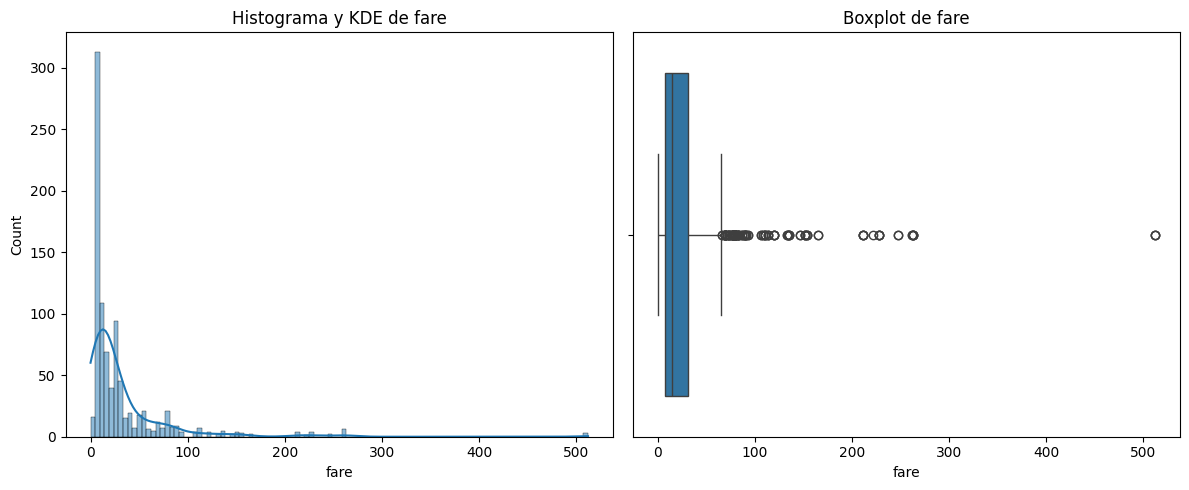

In [117]:
plot_combined_graphs(df_titanic,["fare"])

* Como sospechabamos , hay bastantes outliers pero por ahora nos ceñimos a la pregunta inicial y la respuesta es si, si hay relación entre el precio del billete y la superviviencia del pasajero.

In [ ]:
# Comprobamos mediante un estadístico si es cierta la afirmación anterior, es decir, si realmente hay alguna relación entre ambas variables.
# Para ello vamos a utilizar el estadístico de Mann-Whitney U:

grupo_vivos = df_titanic[df_titanic["alive"] == "yes"]['fare'] # separamos los datos de los pasajeros que sobrevivieron.
grupo_muertos = df_titanic[df_titanic["alive"] == "no"]['fare'] # separamos los datos de los pasajeros que no sobrevivieron.

stat, p = mannwhitneyu(grupo_vivos, grupo_muertos) # ponemos en marcha el estadístico.
print(f'p-value: {p}')

p-value: 4.553477179250237e-22


* El resultado del estadístico es 4.55e-22, muy por debajo de 0.05 por lo que podemos confirmar que hay una relación estadísitica significativa entre ambas variables.

## 1.5 ¿ Por qué hay pasajeros que no han pagado billete? ¿ Qué ocurrió con el pasajero que pagó más por el billete?

In [124]:
pasajeros_gratis = df_titanic.loc[df_titanic["fare"]==0]
pasajeros_gratis

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.0,0.0,Third,man,True,Southampton,no,True,0
263,male,40.0,0.0,First,man,True,Southampton,no,True,0
271,male,25.0,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.0,0.0,Second,man,True,Southampton,no,True,0
302,male,19.0,0.0,Third,man,True,Southampton,no,True,0
413,male,33.0,0.0,Second,man,True,Southampton,no,True,0
466,male,33.0,0.0,Second,man,True,Southampton,no,True,0
481,male,33.0,0.0,Second,man,True,Southampton,no,True,0
597,male,49.0,0.0,Third,man,True,Southampton,no,True,0
633,male,33.0,0.0,First,man,True,Southampton,no,True,0


POSIBLES CAUSAS
* Teniendo en cuenta que todos las personas que no pagaron el billete eran hombres , adultos, viajaban solos y salvo uno el resto no sobrevivió, podrían ser parte de la tripulación abordo.
* Si tenemos en cuenta la clase de los pasajeros que no pagaron el billete , podríamos deducir que la clase de su caparote representaba el rango del marinero estando la primer clase reservada para los oficiales o capitanes.
* Por último, podría ser un fallo en el recuento o contabilización pero es la opción menos probable bajo mi punto de vista.

In [128]:
pasajero_premium = df_titanic.loc[df_titanic["fare"]== df_titanic["fare"].max()]
pasajero_premium

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


* Son tres personas las que pagaron lo máximo posible por si billete. Los tres sobrevivieron al accidente.

## 1.6 ¿HAY RELACIÓN ENTRE EL DINERO PAGADO, LA CIUDAD DE EMBARQUE Y LA SUPERVIVENCIA DEL PASAJERO?




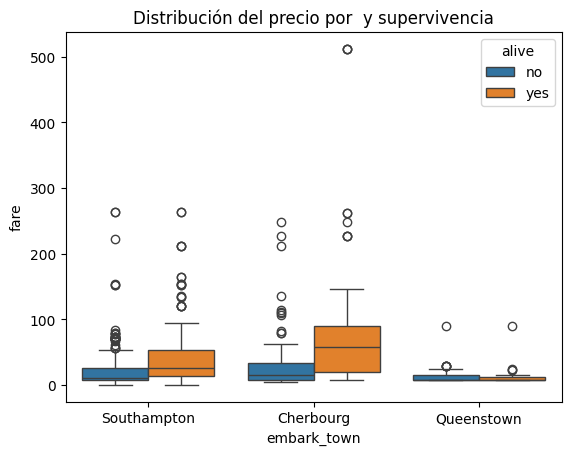

In [134]:
sns.boxplot(x='embark_town', y='fare', hue='alive', data=df_titanic)
plt.title('Distribución del precio por  y supervivencia')
plt.show()

### 1.7  Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

In [139]:
# vamos a crear una nueva columna que cruze la información tanto de la clase como de la edad , en este caso usaremos "who" para referirnos a la edad por grupos.
df_titanic["group"]= df_titanic["class"]+ "_" + df_titanic["who"]
df_titanic["group"]

0        Third_man
1      First_woman
2      Third_woman
3      First_woman
4        Third_man
          ...     
886     Second_man
887    First_woman
888    Third_woman
889      First_man
890      Third_man
Name: group, Length: 891, dtype: object

In [147]:
supervivientes = df_titanic.loc[df_titanic["alive"]== "yes"] # creamos la busqueda con todos los datos de los supervivientes, descartando a los no supervivientes.
supervivientes

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,group
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1,First_woman
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0,Third_woman
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1,First_woman
8,female,27.0,11.1333,Third,woman,False,Southampton,yes,False,2,Third_woman
9,female,14.0,30.0708,Second,child,False,Cherbourg,yes,False,1,Second_child
...,...,...,...,...,...,...,...,...,...,...,...
875,female,15.0,7.2250,Third,child,False,Cherbourg,yes,True,0,Third_child
879,female,56.0,83.1583,First,woman,False,Cherbourg,yes,False,1,First_woman
880,female,25.0,26.0000,Second,woman,False,Southampton,yes,False,1,Second_woman
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0,First_woman


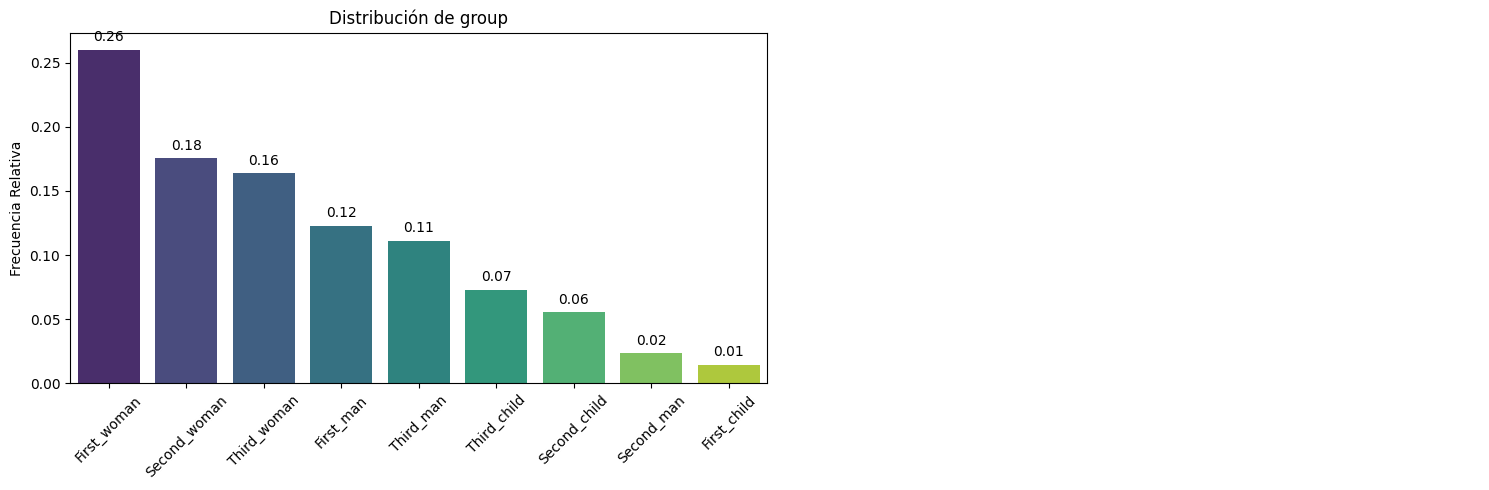

In [ ]:

# Ahora podemos representar por grupos los supervivientes.

pinta_distribucion_categoricas(supervivientes,["group"],relativa=True, mostrar_valores=True)

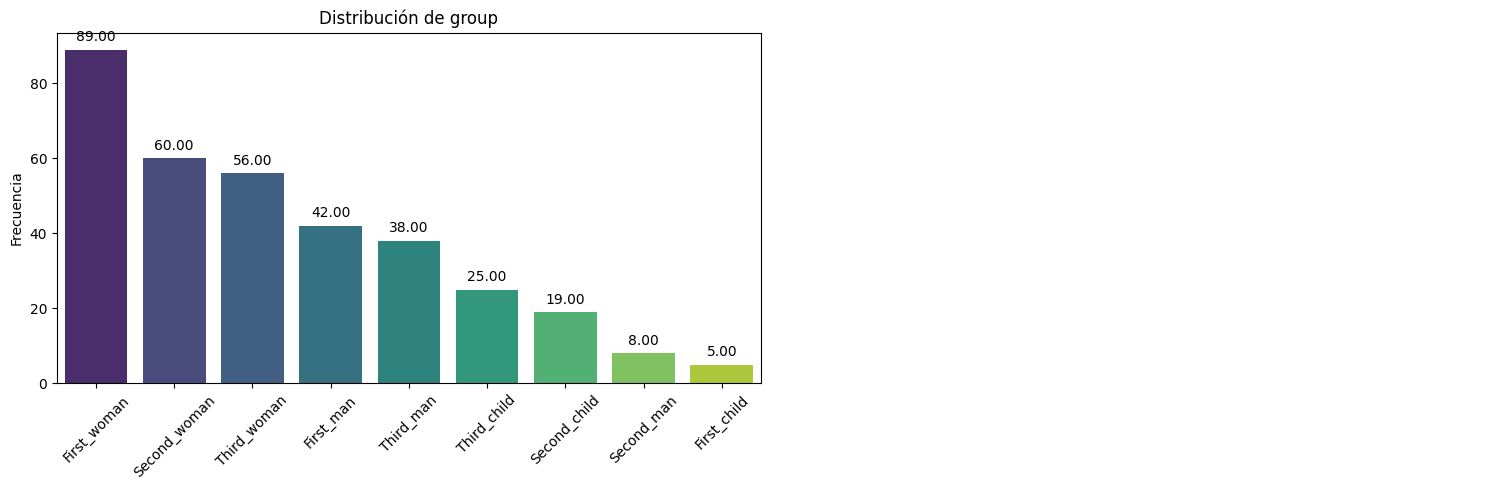

In [150]:
pinta_distribucion_categoricas(supervivientes,["group"],relativa=False, mostrar_valores=True)

GRUPO CON MAYOR SUPERVIVIENCIA EN TERMINOS RELATIVOS Y ABSOLUTOS.
* El grupo con mayor número de supervivientes representa a las mujeres que pertenecían a la primera clase, representando un 26% de todos los supervivientes siendo en terminos absolutos un total de 89 mujeres.
* Tanto la segunda como la tercera pertenece a mujeres por lo que esto confirma lo que hemos ido analizando hasta ahora de que las mujeres tienen una tasa de superviviencia mayor que los hombres.


## 1.8 POSIBLES RELACIONES ENTRE LA EDAD , EL PRECIO DEL BILLETE Y LA TASA DE SUPERVIVENCIA

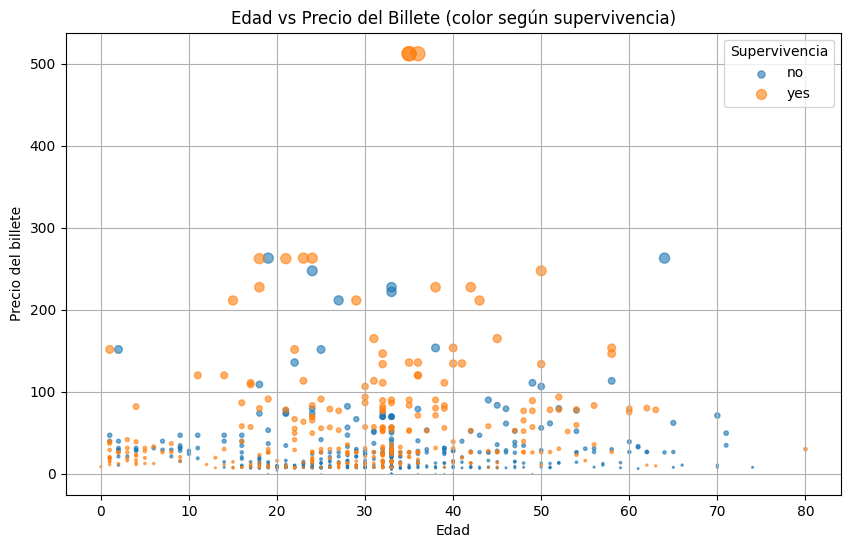

In [151]:
# Asignar colores a la columna 'alive'
df_titanic['color'] = df_titanic['alive'].map({'yes': 'green', 'no': 'red'})

sizes = (df_titanic['fare'] - df_titanic['fare'].min() + 1) / 5  # ajusta el escalado si es necesario

plt.figure(figsize=(10, 6))
for status in df_titanic['alive'].unique():
    subset = df_titanic[df_titanic['alive'] == status]
    plt.scatter(subset['age'], subset['fare'], s=sizes[subset.index], label=status, alpha=0.6)

plt.xlabel('Edad')
plt.ylabel('Precio del billete')
plt.title('Edad vs Precio del Billete (color según supervivencia)')
plt.legend(title='Supervivencia')
plt.grid(True)
plt.show()


* Tanto el precio del billete como la edad son factores clave para la supervivencia de los pasajeros . En nuestro estudio hemos visto que la posibilidad de sobrevivir era significativamente mayor si el pasajero pagabaun peaje de primera clase que de tercera clase.
* En cuanto a la edad podemos ver en el gráfico que es más probable la supervivencia si el pasajero es joven.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.